##  Advanced Topics in ML & DM
### Nicolas Rojas
##  Report Time Series Classification: ROCKET

### Introduction

ROCKET (for RandOm Convolutional KErnel Transform) is a time series classification approach that uses random convolutional kernels so as to transform a time series into features useful for a linear classifier. 

This work shows a comparison beetween ROCKET, and other algorithms for Time Series Classification, as SAST, HIVE-COTE, ST and Catch22. Most of these methods are implemented in Python through the sktime framework.

In order to compare results obtained for the different aproaches, the algorithms were applied uniquely to the Chinatown Dataset. This dataset contains pedestrian count in Chinatown-Swanston St North for 12 months of the year 2017. Furthermore, classes, for this dataset, are based on whether data are from a normal day or a weekend day (Class 1: Weekend - Class 2: Weekday).

The implementation of the different methods were performed locally using an Intel Core i7-6820HQ CPU @ 2.70GHz processor.

### Exploratory data analysis Dataset:


In [1]:
from sktime.datasets import load_UCR_UEA_dataset
from sktime.classification.kernel_based import RocketClassifier
import time
import numpy as np
import pandas as pd
from sast.sast import znormalize_array,from_2d_array_to_nested
import matplotlib.pyplot as plt
from sktime.datasets import tsc_dataset_names

In [2]:
max_ds=len(tsc_dataset_names.univariate_equal_length) #exploring dataset in UEA & UCR Time Series Classification Repository
print(tsc_dataset_names.univariate_equal_length)


['ACSF1', 'Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxTW', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'InsectEPGSmallTrain', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'Mixe

In [3]:
ds='Chinatown' # Chosing a dataset from # Number of classes to consider
X_train, y_train = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")

classes = np.unique(y_train)
max_class_to_plot = min(3, len(classes)) # Number of classes to consider

print("shape train DS:", X_train.shape) # Shape of the dataset


shape train DS: (20, 24)


classes: ['1' '2'] count_per_classes= 5 max_class_to_plot= 2


Text(0.5, 1.0, 'Class: ?')

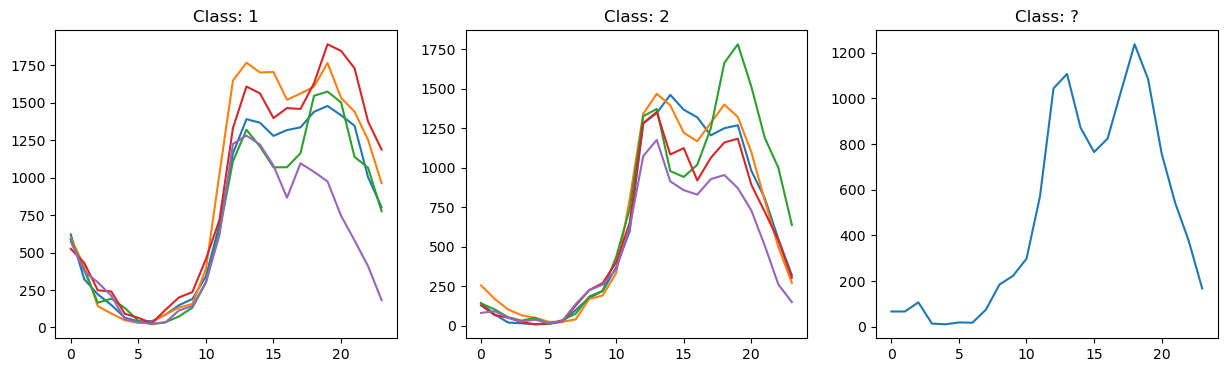

In [4]:
count_per_classes = 5 # Number of instances to plot per each class

print("classes:",classes,"count_per_classes=", count_per_classes,"max_class_to_plot=", max_class_to_plot)

plt.figure(figsize=(15, 4))

for i, c in enumerate(classes[:max_class_to_plot]):
    #print ("i=",i,"c=",c)
    #print ("y_train==c:",np.where(y_train==c)[0])
    ts_indices = np.random.choice(np.where(y_train==c)[0], size=count_per_classes+1, replace=False)
    #print ("ts_indices:",ts_indices)
    plt.subplot(1, max_class_to_plot+1, i+1)
    
    for idx in ts_indices[:-1]:
        plt.plot((X_train[idx]))
        #print(X_train[idx][19])
    plt.title(f'Class: {c}')
    
plt.subplot(1, max_class_to_plot+1, i+2)
plt.plot((X_train[ts_indices[-1]]))
plt.title(f'Class: ?')

Firstly, in order to apply ROCKET to the Chinatown dataset (which contains 20 TS objects of length 24), the libraries "load_UCR_UEA_dataset" and "RocketClassifier" are imported. 

An instance of "RocketClassifier" is created (with 10.000 kernels) and fitted with the training dataset. This step takes a duration of aprox. 7s and the accuracy of the model (#correct_preds / #all_preds) was 0.9825, using the testing dataset.

In [5]:
from sktime.classification.kernel_based import RocketClassifier
start = time.time()
rocket= RocketClassifier(num_kernels=10_000)
rocket.fit(X_train,y_train)
print('score:',rocket.score(X_test,y_test))
end = time.time()

print('duration:', end-start)

score: 0.9825072886297376
duration: 14.541055917739868


### Using iSAST on Chinatown Dataset:


Additionally, for the Chinatown dataset the SAST algorithm was applied. This implementation was cloned from the following URL: https://github.com/frankl1/sast

In [6]:
from sast.utils import *
from sast.sast import *
from sktime.datasets import load_UCR_UEA_dataset
import time

start = time.time()
random_state = None
#ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
#isast_ridge = iSAST(nb_inst_per_class=1, 
#                          random_state= random_state, classifier=ridge)

# optimal combination: n_random_points=10,nb_inst_per_class=100
sast_ridge = SAST(nb_inst_per_class=1, classifier=RidgeClassifierCV())
sast_ridge.fit(X_train, y_train)
print('score:', sast_ridge.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

score: 0.9329446064139941
duration: 4.234554290771484


### Using SAST on Chinatown Dataset:

SAST was used in combination with a ridge classifier, obtaining an accuracy of 0.9 approximately. Additionally, the time to create the Ridge Classifier instance, the SAST instance and fitting the model was of about 1s.

In [9]:
start = time.time()
random_state = None
ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
sast_ridge = SAST(
                          nb_inst_per_class=1, 
                          random_state= random_state, classifier=ridge)
sast_ridge.fit(X_train, y_train)
print('score:', sast_ridge.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

score: 0.9708454810495627
duration: 0.8049769401550293


1 (1, 24)
-0.02399598250909643


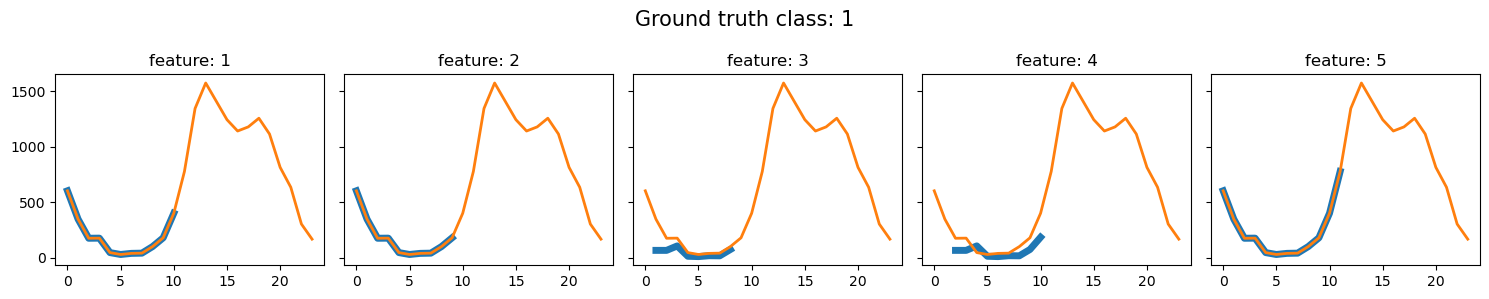

2 (1, 24)
-0.02399598250909643


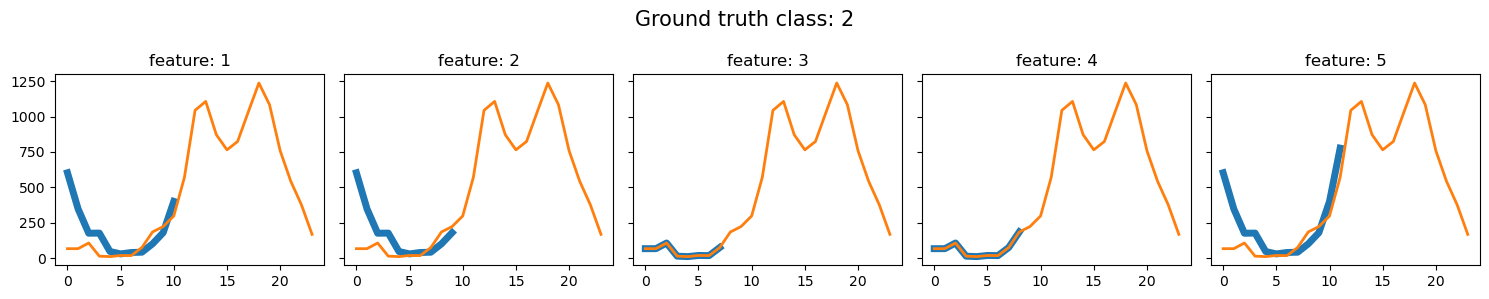

In [10]:
for c, ts in sast_ridge.kernels_generators_.items():
    fname = f'images/chinatown-ridge-class{c}-top5-features-on-ref-ts.jpg'
    print(c,ts.shape )
    print(min(sast_ridge.classifier.coef_[0]))
    plot_most_important_feature_on_ts(ts.squeeze(), c, sast_ridge.kernel_orig_, sast_ridge.classifier.coef_[0], limit=5, offset=0, fname=fname) # plot only the first model one-vs-all model's features


### Using SASTEN on Chinatown Dataset:

SASTEN consist of an ensamble of SAST models. SASTEN, also was applied to the Chinatown dataset with a "RandomForestClassifier". Particularly, the implementation of "ShapeletTransform" was imported directly from sktime library.

Applying SASTEN...

In [11]:
candidate_length_list = [list(range(3, 10)), list(range(10, 17)), list(range(17, 24))]
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
#clf = RandomForestClassifier(min_impurity_decrease=0.05, max_features=None)
saste = SASTEnsemble(cand_length_list=candidate_length_list,
                          nb_inst_per_class=nb_inst_per_class, 
                          random_state=random_state, classifier=clf, n_jobs = -1)

start = time.time()

saste.fit(X_train, y_train)

print('Score:', saste.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

Score: 0.9475218658892128
duration: 12.244537115097046


### Using Shapelet Transform on Chinatown Dataset:

Similar to SAST, Shapelet transform (ST) consist of a separate process for the classification. ST was applied to the Chinatown dataset with a "RandomForestClassifier". Particularly, the implementation of "ShapeletTransform" was imported directly from sktime library.

In [12]:
from sktime.transformations.panel.shapelet_transform import ShapeletTransform

Applying ST algorithm, it was obtained a score of 0.97 in 1m40s approx. This difference in time, compared to SAST, it is due to the fact, that in SAST, time series are chosen randomly for each class, in order to find the best subsequences that allows to make the classification.

In [13]:
start = time.time()
#Creating a ShapeletTransform and fitting
st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
st.fit(X_train_sktime, y_train)
#Making the tranformation of time series and training a RandomForestClassifier model
X_test_transformed = st.transform(X_test_sktime)
X_train_transformed = st.transform(X_train_sktime)
clf = RandomForestClassifier()
clf.fit(X_train_transformed, y_train)

print('Score:', clf.score(X_test_transformed, y_test))
end = time.time()

print('duration:', end-start)

Score: 0.9708454810495627
duration: 77.34743070602417


### Using Catch22 on Chinatown Dataset:

Catch22 stands for Canonical Time-series Characteristics and it consist on transforming series into the 22 features, extracted from the hctsa toolbox. This approach is also available in sktime library and it was used it with the Chinatown dataset.

In [14]:
from sktime.classification.feature_based import Catch22Classifier

This approach got an score of 0.90 in accuracy and the process of creating Catch22Classifier instance and fitting the model took 32.6s approx.

In [15]:
start = time.time()

catch = Catch22Classifier()
catch.fit(X_train,y_train)

print('score:', catch.score(X_test, y_test))
end = time.time()

print('duration:', end-start)
catch.get_param_names()

score: 0.9300291545189504
duration: 32.94674563407898


['estimator', 'n_jobs', 'outlier_norm', 'random_state', 'replace_nans']

### Using HIVE-COTE on Chinatown Dataset:

Lastly, HIVE-COTE is another time series classification algorithm that was applied to the Chinatown dataset. This approach is an ensemble of the STC, TSF, RISE and cBOSS classifiers. The library used for this implementation was sktime, in particular, the hybrid classification methods.

Due to the characteristic of the Chinatown dataset the algorithm takes too much time to fitting the training data and because of that it was not included the results.

In [16]:
from sktime.classification.hybrid import HIVECOTEV2

In [17]:
start = time.time()
hive= HIVECOTEV2()
hive.fit(X_train, y_train)
#print(st.get_params())
#print('score:', hive.score(X_test, y_test))
end = time.time()

print('duration:', end-start)

### Conclusions

To sum up the method with the highest accuracy was ROCKET which got 0.9825 as score. However, other approaches, like SAST also achieves high accuracy in a short time frame. The simplicity in the hyperparameter tuning can make a diference between choosing one algorithm or another, but also, the selection of the method depends on the diferent datasets that could be used to training the models.